In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [47]:
# Load the dataset
dataset_path = 'UK_foods.csv'
uk_foods_df = pd.read_csv(dataset_path)
uk_foods_df

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


In [48]:
# Display basic statistics of the dataset
dataset_statistics = uk_foods_df.describe()

dataset_statistics

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


In [49]:
# Extract the regions' food consumption data
regions_columns = ['England', 'Wales', 'Scotland', 'N.Ireland']
food_consumption_data = uk_foods_df[regions_columns].values
food_consumption_data

array([[ 105,  103,  103,   66],
       [ 245,  227,  242,  267],
       [ 685,  803,  750,  586],
       [ 147,  160,  122,   93],
       [ 193,  235,  184,  209],
       [ 156,  175,  147,  139],
       [ 720,  874,  566, 1033],
       [ 253,  265,  171,  143],
       [ 488,  570,  418,  355],
       [ 198,  203,  220,  187],
       [ 360,  365,  337,  334],
       [1102, 1137,  957,  674],
       [1472, 1582, 1462, 1494],
       [  57,   73,   53,   47],
       [1374, 1256, 1572, 1506],
       [ 375,  475,  458,  135],
       [  54,   64,   62,   41]])

In [50]:
# Normalize the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
food_consumption_scaled = scaler.fit_transform(food_consumption_data)
food_consumption_scaled

array([[-0.83028135, -0.89096138, -0.78414166, -0.78171514],
       [-0.51150903, -0.6154117 , -0.47903269, -0.34998399],
       [ 0.49034683,  0.66456098,  0.63604179,  0.33520127],
       [-0.73464965, -0.76429741, -0.74243611, -0.7237214 ],
       [-0.62991018, -0.5976343 , -0.60634435, -0.47456313],
       [-0.71415715, -0.73096479, -0.6875604 , -0.62491726],
       [ 0.57003991,  0.82233539,  0.23215655,  1.2953198 ],
       [-0.49329347, -0.53096906, -0.63487972, -0.61632559],
       [ 0.04178864,  0.14679425, -0.09270767, -0.16096736],
       [-0.61852545, -0.6687439 , -0.52732332, -0.52181728],
       [-0.24966034, -0.30875158, -0.27050498, -0.2060736 ],
       [ 1.43983296,  1.40676736,  1.09041269,  0.52421789],
       [ 2.28230266,  2.39563515,  2.19890209,  2.28550915],
       [-0.93957472, -0.95762662, -0.89389308, -0.82252554],
       [ 2.05916204,  1.67120616,  2.44035523,  2.31128414],
       [-0.21550616, -0.06431235, -0.00490653, -0.63350892],
       [-0.94640555, -0.

In [51]:
# Define the input dimension (number of features, 4 regions in this case)
input_features = food_consumption_scaled.shape[1]

# Encoder part of the autoencoder
input_layer = Input(shape=(input_features,))
encoder_hidden_1 = Dense(8, activation='relu')(input_layer)
encoder_hidden_2 = Dense(4, activation='relu')(encoder_hidden_1)
bottleneck_layer = Dense(2, activation='relu')(encoder_hidden_2)  # Bottleneck layer

In [52]:
# Decoder part of the autoencoder
decoder_hidden_1 = Dense(4, activation='relu')(bottleneck_layer)
decoder_hidden_2 = Dense(8, activation='relu')(decoder_hidden_1)
output_layer = Dense(input_features, activation='sigmoid')(decoder_hidden_2)

In [53]:
autoencoder_model = Model(inputs=input_layer, outputs=output_layer)

autoencoder_model.compile(optimizer=Adam(), loss='mse')

training_history = autoencoder_model.fit(food_consumption_scaled, food_consumption_scaled, epochs=200, batch_size=4, shuffle=True, validation_split=0.2)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.1173 - val_loss: 1.8528
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1413 - val_loss: 1.8465
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1323 - val_loss: 1.8405
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3070 - val_loss: 1.8347
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1895 - val_loss: 1.8298
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0339 - val_loss: 1.8256
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0885 - val_loss: 1.8219
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9504 - val_loss: 1.8185
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0415 - val_loss: 1.8153
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2688 - val_loss: 1.8124
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0008 - val_loss: 1.8099
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1978 - val_loss: 1.8074


In [54]:
#Evaluate the performance of the autoencoder (reconstruction loss)
reconstructed_data = autoencoder_model.predict(food_consumption_scaled)
mse = np.mean(np.power(food_consumption_scaled - reconstructed_data, 2), axis=1)
average_mse = np.mean(mse)
print(f'Reconstruction MSE: {average_mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Reconstruction MSE: 0.6213345581257875


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


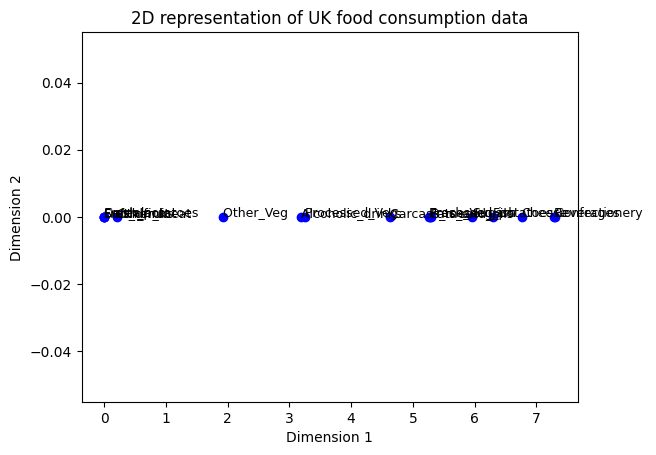

,Dimension 1,Dimension 2,Food
0,6.758396,0.0,Cheese
1,4.628530,0.0,Carcass_meat
2,0.213331,0.0,Other_meat
3,6.297063,0.0,Fish
4,5.285924,0.0,Fats_and_oils
5,5.962385,0.0,Sugars
6,0.000000,0.0,Fresh_potatoes
7,5.275510,0.0,Fresh_Veg
8,1.929478,0.0,Other_Veg
9,5.261809,0.0,Processed_potatoes


In [55]:
#Create enconder model to extract the bottleneck representation
encoder_model = Model(inputs=input_layer, outputs=bottleneck_layer)

scaled_bottleneck = encoder_model.predict(food_consumption_scaled)

plt.scatter(scaled_bottleneck[:, 0], scaled_bottleneck[:, 1], c='b')

for i, food in enumerate(uk_foods_df['Unnamed: 0']):
    plt.text(scaled_bottleneck[i, 0], scaled_bottleneck[i, 1], food, fontsize=9)

plt.title('2D representation of UK food consumption data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Extract the bottleneck representation of the data
bottleneck_df = pd.DataFrame(scaled_bottleneck, columns=['Dimension 1', 'Dimension 2'])
bottleneck_df['Food'] = uk_foods_df['Unnamed: 0']
bottleneck_df

In [57]:
regions_columns = ['England', 'Wales', 'Scotland', 'N.Ireland']
uk_foods_df['Total'] = uk_foods_df[regions_columns].sum(axis=1)

# Sort the foods based on the total consumption
sorted_foods = uk_foods_df.sort_values(by='Total', ascending=False)
sorted_foods[['Unnamed: 0', 'Total']]

,Unnamed: 0,Total
12,Cereals,6010
14,Soft_drinks,5708
11,Fresh_fruit,3870
6,Fresh_potatoes,3193
2,Other_meat,2824
8,Other_Veg,1831
15,Alcoholic_drinks,1443
10,Processed_Veg,1396
1,Carcass_meat,981
7,Fresh_Veg,832
